
# Linear regression


Suppose we conduct an experiment where we observe $n$ data pairs and
call them $(x_i, y_i)$, $i = 1, \dots, n$. We want to describe the
underlying relationship between $y_i$ and $x_i$ involving the error of
the measurements, $\varepsilon_i$, by the following relation:

\begin{equation}
  y_i = \alpha  + \beta x_i + \varepsilon_i .
\end{equation}

This relationship between the true (but unobserved)
parameters $\alpha$ and $\beta$ and the data points is called a *linear
regression model*.


Out goal is to find estimated values, $\widehat{\alpha}$ and
$\widehat{\beta}$, for the parameters $\alpha$ and $\beta$ which would
provide the "best" fit in some sense for the data points
$(x_i, y_i)$,. We chose the best fit in the least-squares sense: the
best-fit line minimizes the sum of squared residuals,
$\widehat{\varepsilon}_i$, which are the differences between measured
and predicted values of the dependent variable y:
\begin{equation}
  \widehat{\varepsilon}_i = y_i - \widehat{\alpha} -
  \widehat{\beta} x_i.   
\end{equation}


That is, we are looking for the values $\widehat{\alpha}$ and
$\widehat{\beta}$ that are the solutions of the following minimization problem:
find
\begin{equation}
  \min_{\widehat{\alpha}, \,\widehat{\beta}}
  Q(\widehat{\alpha}, \widehat{\beta}),
\end{equation}
where
\begin{equation}
  Q(\widehat{\alpha},\widehat{\beta}) = \sum_{i=1}^n \widehat{\varepsilon}_i^2=
  \sum_{i=1}^n \left(y_i - \widehat{\alpha} - \widehat{\beta} x_i\right)^2 .  
\end{equation}


To find a minimum, we take partial derivatives of $Q$ with respect to
$\widehat{\alpha}$ and $\widehat{\beta}$ and equate them to
zeros.


\begin{equation}
  \frac{\partial}{\partial \widehat{\alpha}}
  Q(\widehat{\alpha }, \widehat{\beta}) = 
  -2 \sum_{i=1}^n \left(
    y_i - \widehat{\alpha} - \widehat{\beta} x_i
  \right) = 0 ,
\end{equation}
or
\begin{equation}
  \sum_{i=1}^n \left(y_i - \widehat{\alpha} - \widehat{\beta} x_i
  \right) = 0 .
\end{equation}
Rearranging the terms and
introducing notations $\bar{x}$ and $\bar{y}$ for the average
values of the $x_i$ and $y_i$, respectively:
\begin{equation}
  \bar{x} \equiv \frac{1}{n} \sum_{i=1}^n x_i, \quad
  \bar{y} \equiv \frac{1}{n} \sum_{i=1}^n y_i ,
\end{equation}
we obtain:
\begin{equation}
  \widehat{\alpha} = \bar{y} - \widehat{\beta} \bar{x} , 
\end{equation}
or
\begin{equation}
  \bar{y} = \widehat{\alpha} + \widehat{\beta} \bar{x} .
\end{equation}
This relation can be interpreted as follows: the best
fit line passes through the ``center of mass'' of the data points.



Now, take the derivative with respect to $\widehat{\beta}$:
\begin{equation}
  \frac{\partial}{\partial \widehat{\beta}}
  Q(\widehat{\alpha}, \widehat{\beta}) =
  -2 \sum_{i=1}^n \left(
    \left( y_i - \bar{y} \right) -
    \widehat{\beta} \left( x_i - \bar{x} \right)
  \right) \left( x_i - \bar{x} \right) = 0  .
\end{equation}
Rearranging the terms,
\begin{equation}
  \sum_{i=1}^n \left( y_i - \bar{y} \right)
  \left(x_{i}- \bar{x} \right) -
  \widehat{\beta}\sum_{i=1}^n \left(x_i -\bar{x} \right)^{2} = 0,
\end{equation}
or
\begin{equation}
  \widehat{\beta} = \frac{\displaystyle
    \sum_{i=1}^n \left( y_i - \bar{y} \right)
    \left( x_i -\bar{x} \right)
  }{
    \displaystyle \sum_{i=1}^n \left( x_i - \bar{x} \right)^{2}
  } .
\end{equation}
We can now
determine $\widehat{\alpha}$.
\begin{equation}
   \widehat{\alpha} = \bar{y} - \widehat{\beta} \bar{x} .
\end{equation}

These relations  solve the problem of finding the least squares fit to the data.


## Example

In [1]:

"""
    alpha, beta, sigma = linear_regression(x, y)

Least square fit y = alpha + beta x. sigma is the standard error of beta
"""
function linear_regression(x, y)
    np = length(x)
    xbar = sum(x)/np
    ybar = sum(y)/np
    x2 = sum((x .- xbar) .^ 2)
    beta = sum((y .- ybar) .* (x .- xbar))/x2
    alpha = ybar - beta*xbar
    sigma = sqrt(sum((y .- alpha .- beta .* x) .^ 2)/((np - 2)*x2))
    return alpha, beta, sigma
end

linear_regression

In [2]:

using PyPlot


"Prepare" the data 

In [3]:

xmin = 0.0
xmax = 10.0
np = 200
sc = 1.5  # noise level
x = range(xmin, xmax, np)
β₀ = 2.0
y = β₀ * x .+ sc .* randn(np);

In [4]:

alpha, beta, sigma = linear_regression(x, y);

In [5]:

round(beta, sigdigits=3)

2.04

In [7]:

round(sigma, sigdigits=3)

0.0365

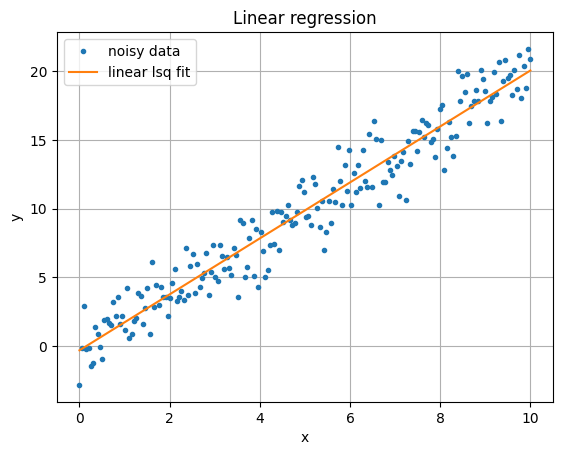

In [8]:

plot(x, y, linestyle="none", marker=".", label="noisy data")
plot(x, alpha .+ beta .* x, linestyle="solid", label="linear lsq fit")

grid(true)
xlabel("x")
ylabel("y")
title("Linear regression")
legend();

## Confidence interval


A *confidence interval* is a range of values, calculated from sample data, that is likely 
to contain the true value of a parameter of the model. It consists of a point estimate 
(like a sample mean) plus or minus a margin of error. The confidence level (e.g., 95%) 
indicates the long-term success rate of the method: if you were to repeat the sampling 
process many times, 95% of the resulting intervals would contain the true parameter value. 


#### Key components:

> **Point estimate:** A single value that estimates the model parameter.

> **Margin of error:** A value that quantifies the uncertainty in your estimate due to random sampling error. It is added to and subtracted from the point estimate to create the interval. 

> **Confidence level:** The probability that the confidence interval will contain the true model parameter. A higher confidence level (e.g., 99% vs. 95%) requires a wider interval.

#### How to interpret a confidence interval

> A 95% confidence interval means that if you were to take many different samples and calculate a confidence interval for each, about 95% of those intervals would capture the true parameter value. 

In [9]:

using Random

In [10]:
Random.seed!(123) # to have reproducible results

TaskLocalRNG()

In [11]:
nrep = 1000
betas = zeros(nrep);

Repeat the "experiment" nrep times

In [12]:
for i = 1:nrep
    y = β₀ * x .+ sc * randn(np)
    _, betas[i], _ = linear_regression(x, y)
end


Distribution of the slopes:

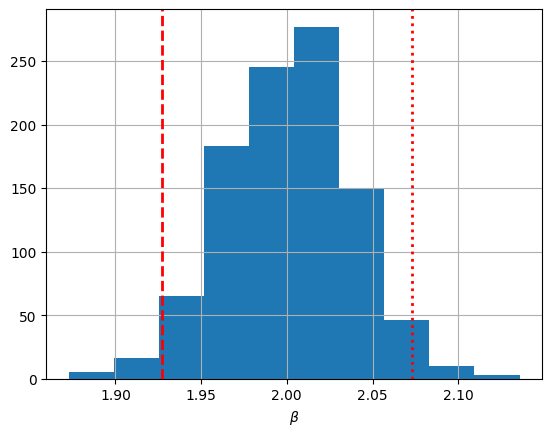

In [13]:
hist(betas)
grid(true)
xlabel(L"\beta")
axvline(x=2.0 - 2*sigma, color="r", linestyle="--", linewidth=2)
axvline(x=2.0 + 2*sigma, color="r", linestyle=":", linewidth=2);

In [14]:
round(sigma, digits=3)

0.037

In [15]:
round(beta, sigdigits=3)

2.04